# Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway. John Hogue made the dataset available.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

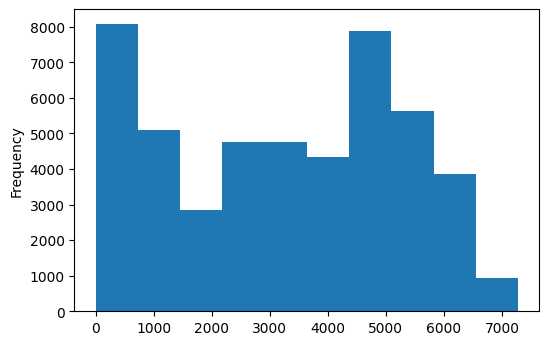

In [5]:
traffic['traffic_volume'].plot.hist()

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
import datetime
from datetime import datetime

In [8]:
traffic['date_time']=pd.to_datetime(traffic['date_time'])
day_traffic=traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
day_traffic.shape

(23877, 9)

In [9]:
day_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [10]:
night_traffic=traffic[(traffic['date_time'].dt.hour <7 ) | (traffic['date_time'].dt.hour >= 19)]

In [11]:
night_traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [12]:
day_traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [13]:
night_traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


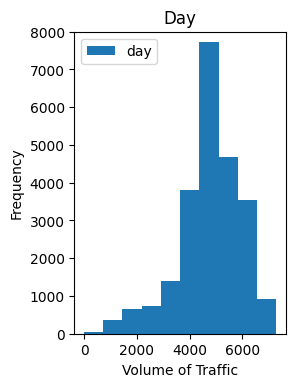

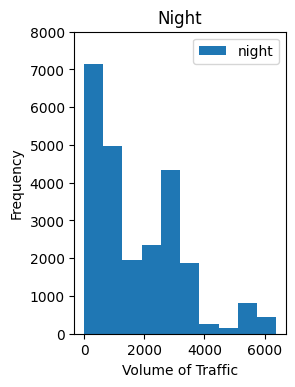

In [14]:
plt.figure()

plt.subplot(1,2,1)
plt.hist(day_traffic['traffic_volume'], label='day')
plt.title('Day')
plt.xlabel('Volume of Traffic')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.hist(night_traffic['traffic_volume'], label='night')
plt.title('Night')
plt.xlabel('Volume of Traffic')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.legend()
plt.show()

The day time graph is left skewed. There is higher frequency of high-volume traffic, i.e. we can observe that there is high volume of traffic during daytime.
The night time graph is right skewed. Most of the time, the volume of traffic is between 0-1000. Thus, we can observe lower traffic at night-time.

In [15]:
day_traffic['month']=day_traffic['date_time'].dt.month
by_month=day_traffic.groupby('month').mean()

<ipython-input-15-991888f11f45>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


In [17]:
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

(1.0, 12.0)

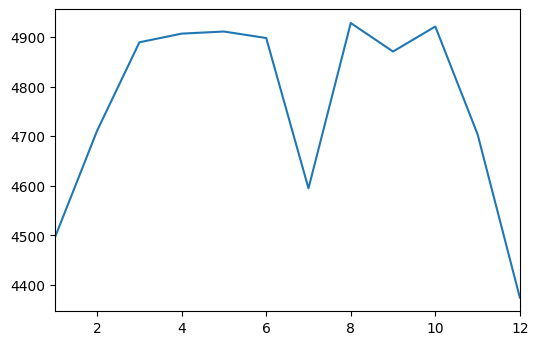

In [19]:
plt.plot(by_month['traffic_volume'])
plt.xlim(1,12)

It is interesting to note that the month of July stands out

In [20]:
day_traffic['dayofweek']= day_traffic['date_time'].dt.dayofweek
by_dayofweek= day_traffic.groupby('dayofweek').mean()
by_dayofweek

<ipython-input-20-32a3c2223daa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
dayofweek,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,6.401243
1,282.301770,0.129172,0.000194,52.333234,5189.004782,6.458757
2,282.198316,0.068099,0.001091,53.662119,5284.454282,6.619158
3,282.279115,0.172436,0.000148,53.993191,5311.303730,6.501184
4,282.181216,0.092828,0.000225,51.412200,5291.600829,6.575067
5,282.300646,0.107596,0.000094,50.446376,3927.249558,6.498821
6,282.280340,0.133170,0.000000,52.288699,3436.541789,6.604179


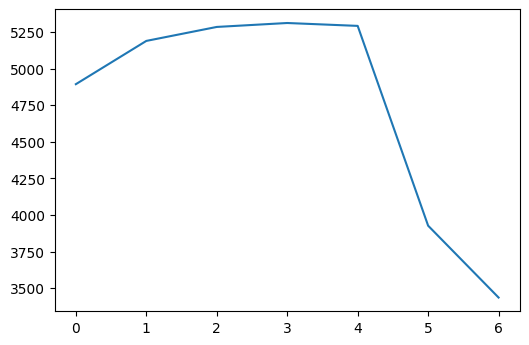

In [21]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

Traffic is significantly lower on weekends than weekdays

In [22]:
day_traffic['hour']=day_traffic['date_time'].dt.hour
business_days= day_traffic[day_traffic['dayofweek'] <=4]
business_days.head()

<ipython-input-22-d5182889e03f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,13


In [23]:
weekend=day_traffic[day_traffic['dayofweek']>=5]
weekend.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,6,15
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,6,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,6,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,6,17
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947,9,6,18


In [24]:
by_hour_business=business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

In [25]:
by_hour_business

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
hour,,,,,,,
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,1.984407
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,1.989175
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,1.981263
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,1.957888
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,1.979957
12,282.832763,0.090271,0.001543,53.855714,4855.382143,6.569286,1.989286
13,283.292447,0.092433,0.000370,53.325444,4859.180473,6.465237,1.982988
14,284.091787,0.102991,0.000746,55.326531,5152.995778,6.588318,1.990852
15,284.450605,0.090036,0.000274,54.168467,5592.897768,6.541397,1.962563


In [26]:
by_hour_weekend

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
hour,,,,,,,
7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,5.501656
8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,5.503322
9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,5.492201
10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,5.503436
11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,5.491892
12,282.936119,0.095784,0.000000,51.418018,4372.482883,6.500901,5.493694
13,283.784951,0.180452,0.000000,53.095841,4362.296564,6.580470,5.497288
14,284.663261,0.087847,0.000000,52.735401,4358.543796,6.644161,5.500000
15,284.854578,0.074771,0.000000,52.148624,4342.456881,6.612844,5.506422


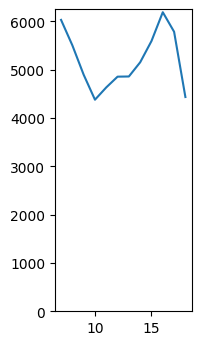

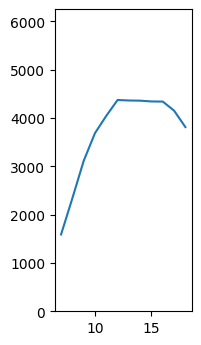

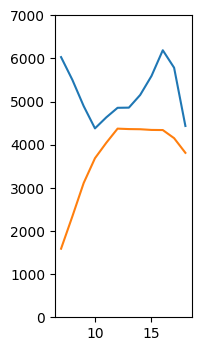

In [27]:
plt.figure()
plt.subplot(1,3,1)
plt.plot(by_hour_business['traffic_volume'])
plt.ylim(0,6250)
plt.show()
plt.subplot(1,3,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylim(0,6250)
plt.show()
plt.subplot(1,3,3)
plt.plot(by_hour_business['traffic_volume'])
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylim(0,7000)
plt.show()

evenings are rush hours for both

In [28]:
weather_corr=day_traffic.corr()['traffic_volume']
weather_corr

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

(225.0, 325.0)

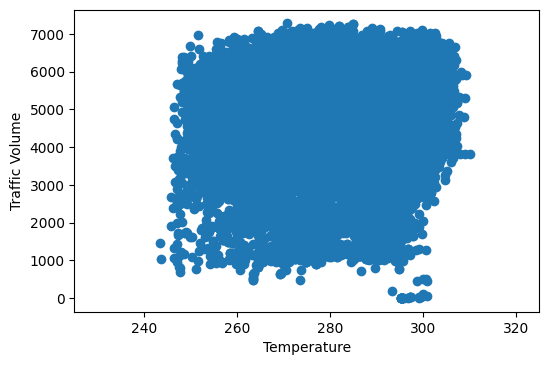

In [29]:
plt.scatter(day_traffic['temp'], day_traffic['traffic_volume'])
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.xlim(225,325)

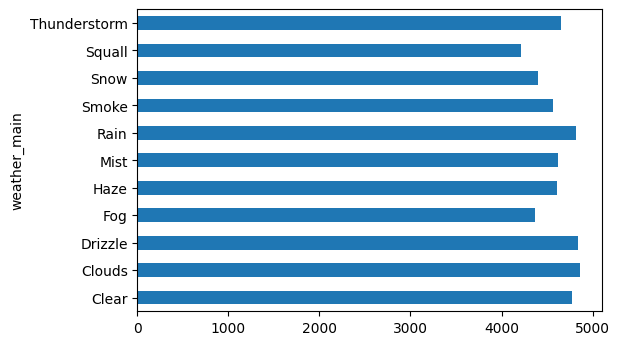

In [30]:
by_weather_main=day_traffic.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()

no significant diff

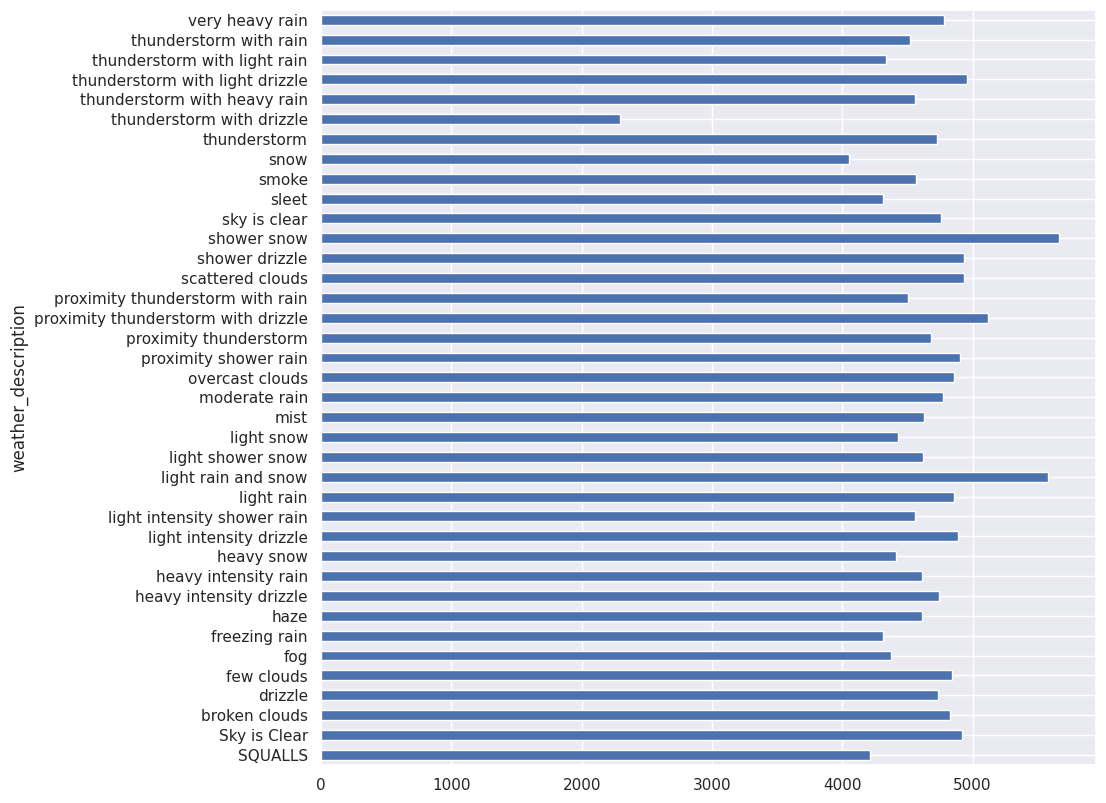

In [46]:
by_weather_desc=day_traffic.groupby('weather_description').mean()
plt.rcParams['figure.figsize'] = [10, 10]
by_weather_desc['traffic_volume'].plot.barh()

It looks like there are three weather types where traffic volume exceeds 5,000:

Shower snow
Light rain and snow
Proximity thunderstorm with drizzle

### Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- business days, the rush hours are around 7 and 16.
- Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle